<a href="https://colab.research.google.com/github/eentartetekunst/NGS_bioinformatics/blob/main/HW3_edgeR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("googledrive")
library("googledrive")

if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")){ 
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
} 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#  install libs

In [2]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
#BiocManager::install(version = "3.15", ask = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
BiocManager::install(c("edgeR"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies ‘limma’, ‘locfit’, ‘Rcpp’


Old packages: 'IRkernel', 'bslib', 'callr', 'data.table', 'devtools', 'digest',
  'evaluate', 'ggplot2', 'jsonlite', 'lubridate', 'openssl', 'pkgload',
  'processx', 'ps', 'roxygen2', 'sys', 'tibble', 'tidyverse', 'vctrs', 'xfun',
  'yaml', 'zip', 'foreign', 'mgcv', 'rpart'



In [4]:
install.packages("edgeR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘edgeR’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [5]:
library(edgeR)

Loading required package: limma



In [6]:
install.packages("statmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages('plotly')
library(plotly) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [8]:
install.packages('dendextend')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘viridis’




In [9]:
library(dendextend)


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




# load data

In [22]:
GenewiseCounts <- read.csv("/content/GenewiseCounts.csv", row.names = 1)  # row.names = 1 переиндексирует дф по 1 столбцу (названия генов)

# read data

In [23]:
head(GenewiseCounts) 

,Length,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000077223,128,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000044387,414,0,0,0,0,3,0,0,0,0,0
ENSMUSG00000033863,4815,46,60,188,449,4375,54,88,85,189,2934
ENSMUSG00000080626,121,0,0,0,0,3,0,0,0,0,1
ENSMUSG00000006456,3910,740,826,651,474,298,468,673,507,520,310
ENSMUSG00000095913,663,15,10,8,12,5,16,7,9,5,8


In [24]:
Age <- c(14.5, 15.5, 17.5, 20, 34, 14.5, 15.5, 17.5, 20, 34)
Tissue <- c("B","B","B","B","B", "C", "C", "C", "C", "C")

targets <- data.frame(Age, Tissue)
targets 

Age,Tissue
<dbl>,<chr>
14.5,B
15.5,B
17.5,B
20.0,B
34.0,B
14.5,C
15.5,C
17.5,C
20.0,C


In [32]:
d = GenewiseCounts[,-1] 
d = as.matrix(d)
head(d)

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
ENSMUSG00000077223,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000044387,0,0,0,0,3,0,0,0,0,0
ENSMUSG00000033863,46,60,188,449,4375,54,88,85,189,2934
ENSMUSG00000080626,0,0,0,0,3,0,0,0,0,1
ENSMUSG00000006456,740,826,651,474,298,468,673,507,520,310
ENSMUSG00000095913,15,10,8,12,5,16,7,9,5,8


In [33]:
m = data.frame(tissue=substr(colnames(d),1,1),age=as.numeric(sub('_','.',substr(colnames(d),2,10))))
m$col=ifelse(m$tissue=='B','purple','pink')
rownames(m) = colnames(d)
head(m)

,tissue,age,col
,<chr>,<dbl>,<chr>
B14_5,B,14.5,purple
B15_5,B,15.5,purple
B17_5,B,17.5,purple
B20,B,20.0,purple
B34,B,34.0,purple
C14_5,C,14.5,pink


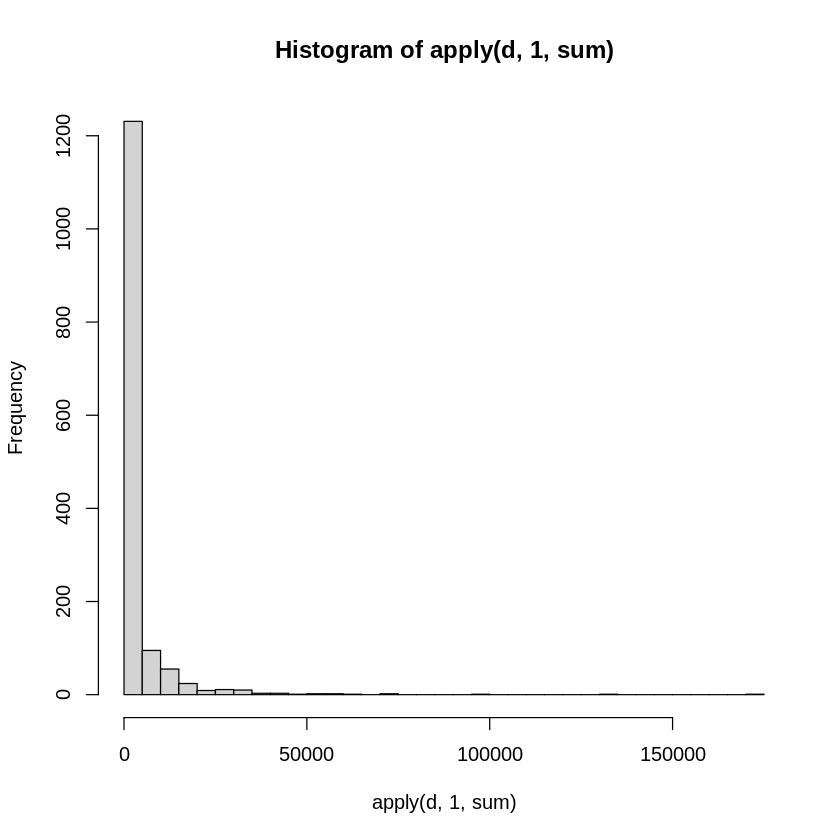

In [35]:
hist(apply(d,1,sum),40) # sum of a column 

# remove genes with low level count (less then 9 counts)

In [ ]:
table(apply(d,1,sum)>9)
d = d[apply(d,1,sum)>9,]


FALSE  TRUE 
  639   813 

# Create a DGEList and normalize lib size

In [41]:
edger = DGEList(d) 
edger = calcNormFactors(edger,method='RLE', robust=TRUE) 
options(digits=2)
edger$samples

,group,lib.size,norm.factors
,<fct>,<dbl>,<dbl>
B14_5,1,434169,1.02
B15_5,1,416631,1.05
B17_5,1,414857,1.05
B20,1,432382,1.02
B34,1,451515,0.88
C14_5,1,427763,1.01
C15_5,1,413218,1.05
C17_5,1,445362,0.98
C20,1,446143,1.06


#2. Используя данные из предыдущего ДЗ при помощи edgeR найти гены с межтканевыми и/или возрастными изменениями экспресии 
1. (корректированное p-value < 0.05, межтканевые отличия должны быть не менее чем в два раза)
2. возрастные изменения можно считать линейными по возрасту. 
3. Используйте модель ~ tissue + age

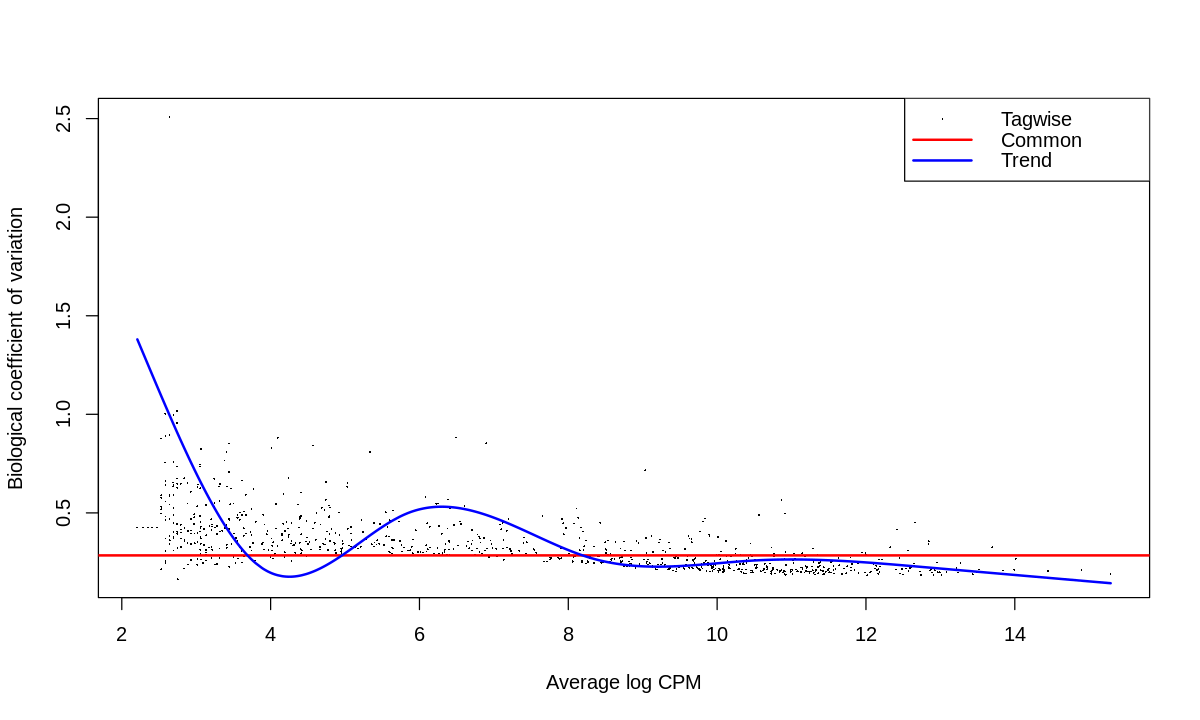

In [58]:
options(repr.plot.width=10, repr.plot.height=6)

design = model.matrix(~ tissue + age, data = m) # create design matrix

edger = estimateDisp(edger,design)  # estimate dispersion 

edger = estimateGLMCommonDisp(edger,design)
edger = estimateGLMTagwiseDisp(edger,design)
edger = estimateGLMTrendedDisp(edger,design)

plotBCV(edger)

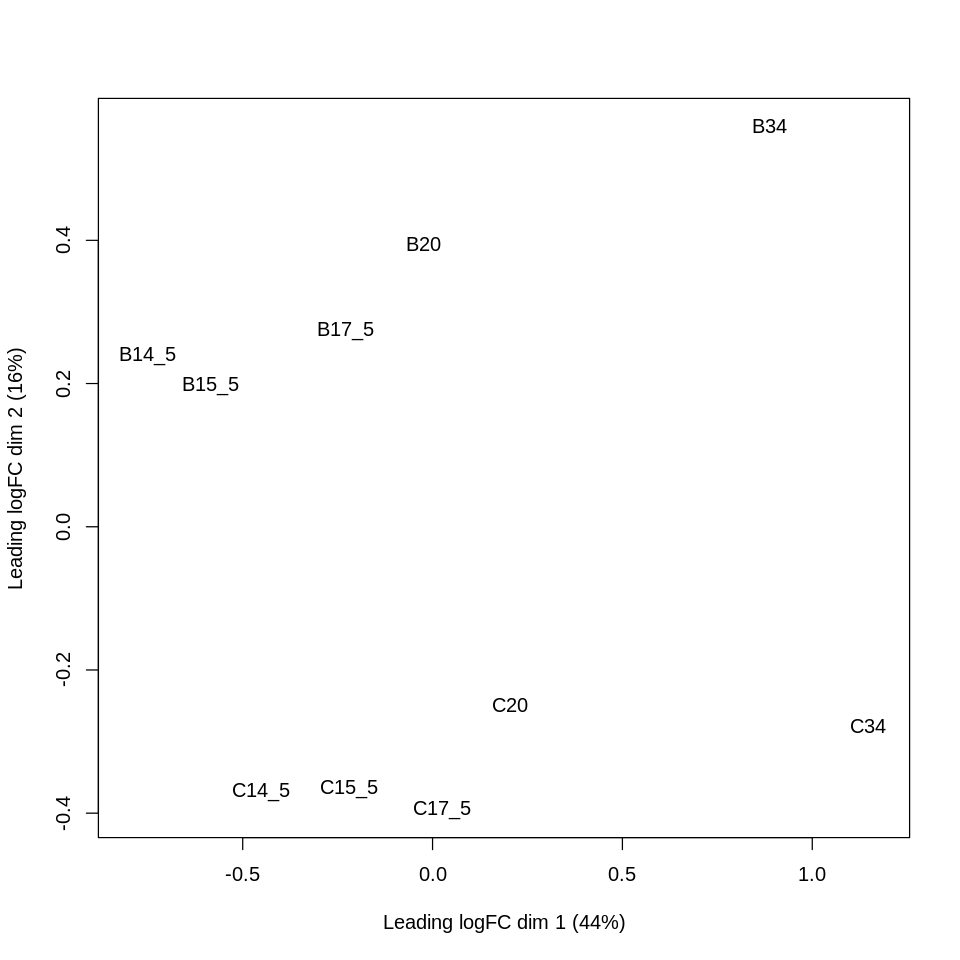

In [59]:
options(repr.plot.width=8, repr.plot.height=8)

plotMDS(edger)

dim 1  separates the samples by age; dim 2 separates the samples by tissues


In [60]:
edger$common.dispersion

[1] 0.081

The square root of the common dispersion gives the coefficient of variation of biological variation. Here the common dispersion is found to be 0.08, so the coefficient of biological variation is around 0.3.

## fit the model 

In [61]:
design

,(Intercept),tissueC,age
B14_5,1,0,14
B15_5,1,0,16
B17_5,1,0,18
B20,1,0,20
B34,1,0,34
C14_5,1,1,14
C15_5,1,1,16
C17_5,1,1,18
C20,1,1,20
C34,1,1,34


In [62]:
glm = glmFit(edger,design) # обучает линейную регрессию по нашим данным, модель - ткань+возраст

In [63]:
# head(glmLRT(glm)$table)
# таблица с logFC logCPM  LR PValue для генов

In [65]:
head(glmLRT(glm,2)$table) # for tissue

,logFC,logCPM,LR,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000077223,9.6e-16,2.2,0.00,1.000
ENSMUSG00000044387,-2.4e+00,2.4,3.53,0.060
ENSMUSG00000033863,-5.9e-01,11.0,4.34,0.037
ENSMUSG00000080626,-1.1e+00,2.5,0.79,0.374
ENSMUSG00000006456,-2.4e-01,10.3,1.45,0.229
ENSMUSG00000095913,-1.4e-01,4.7,0.10,0.750


In [64]:
head(glmLRT(glm,3)$table) # for age

,logFC,logCPM,LR,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000077223,-1.1e-17,2.2,0.0,1.0e+00
ENSMUSG00000044387,2.2e-01,2.4,9.0,2.7e-03
ENSMUSG00000033863,3.1e-01,11.0,303.4,6.1e-68
ENSMUSG00000080626,2.4e-01,2.5,12.2,4.7e-04
ENSMUSG00000006456,-5.1e-02,10.3,12.0,5.4e-04
ENSMUSG00000095913,-3.8e-02,4.7,1.5,2.3e-01


## see if there are genes with absolute log fold change > 1 based on tissue (i hope its log2) 

In [78]:
temp_tissue <- glmLRT(glm,2)[abs(glmLRT(glm,2)$table$logFC)>1, ] 
temp_age <- glmLRT(glm,3)

# retain genes with tissue specific abs(logFC) > 
head(temp_tissue$table)

,logFC,logCPM,LR,PValue
,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000044387,-2.4,2.4,3.53,0.0603
ENSMUSG00000080626,-1.1,2.5,0.79,0.3744
ENSMUSG00000006457,1.2,5.6,6.78,0.0092
ENSMUSG00000117837,-2.4,2.4,3.53,0.0603
ENSMUSG00000118092,2.0,2.3,2.63,0.1047
ENSMUSG00000117850,-1.4,2.3,1.38,0.2409


# Genes with intra-tissue expression difference  above 2:

In [98]:
toptags.tissue <- topTags(temp_tissue, sort.by="logFC", p.value=0.05, adjust.method="BH")
head(toptags.tissue)

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051490,5.4,3.4,26,3.8e-07,8.6e-06
ENSMUSG00000024857,5.4,3.5,18,1.8e-05,3.0e-04
ENSMUSG00000097683,-4.8,6.3,83,9.2e-20,2.3e-17
ENSMUSG00000025229,4.7,4.8,47,6.5e-12,3.2e-10
ENSMUSG00000042372,-4.5,5.7,47,6.4e-12,3.2e-10
ENSMUSG00000032773,-4.2,9.8,66,3.9e-16,4.9e-14


In [104]:
# tissue-specific genes with lfc>1 and pval<0.05
ts_genes <- rownames(toptags.tissue)
ts_genes

[1] "ENSMUSG00000051490" "ENSMUSG00000024857" "ENSMUSG00000097683"
 [4] "ENSMUSG00000025229" "ENSMUSG00000042372" "ENSMUSG00000032773"
 [7] "ENSMUSG00000067231" "ENSMUSG00000117692" "ENSMUSG00000048138"
[10] "ENSMUSG00000025215"

## age-specific genes


In [99]:
toptags.age <- topTags(temp_age, sort.by="logFC", p.value=0.05,  adjust.method="BH")
head(toptags.age)

,logFC,logCPM,LR,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000079344,-0.94,3.7,30,4.5e-08,1.2e-06
ENSMUSG00000050121,0.59,7.4,326,6.0e-73,8.7e-70
ENSMUSG00000044220,-0.52,5.4,51,7.8e-13,4.7e-11
ENSMUSG00000075044,-0.47,3.2,16,7.7e-05,8.4e-04
ENSMUSG00000025219,-0.41,3.6,19,1.2e-05,1.7e-04
ENSMUSG00000117937,-0.39,3.1,13,2.5e-04,2.4e-03


In [103]:
# top 10 age-specific genes with pval<0.05
as_genes <- rownames(toptags.age)
as_genes

[1] "ENSMUSG00000079344" "ENSMUSG00000050121" "ENSMUSG00000044220"
 [4] "ENSMUSG00000075044" "ENSMUSG00000025219" "ENSMUSG00000117937"
 [7] "ENSMUSG00000042372" "ENSMUSG00000118167" "ENSMUSG00000094732"
[10] "ENSMUSG00000033863"

In [97]:
head(temp_tissue$fitted.values)

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
ENSMUSG00000044387,2.1e-10,6.8e-10,7.5e-09,1.6e-07,3.0e+00,7.6e-18,2.5e-17,2.8e-16,6.2e-15,1.1e-07
ENSMUSG00000080626,1.5e-10,5.1e-10,5.9e-09,1.3e-07,3.0e+00,5.0e-11,1.7e-10,2.0e-09,4.5e-08,1.0e+00
ENSMUSG00000006457,1.1e+01,1.1e+01,1.1e+01,1.1e+01,1.1e+01,2.5e+01,2.5e+01,2.6e+01,2.8e+01,2.6e+01
ENSMUSG00000117837,2.1e-10,6.8e-10,7.5e-09,1.6e-07,3.0e+00,7.6e-18,2.5e-17,2.8e-16,6.2e-15,1.1e-07
ENSMUSG00000118092,1.7e-08,1.9e-08,2.3e-08,3.1e-08,1.3e-07,1.5e-01,1.7e-01,2.1e-01,3.0e-01,1.2e+00
ENSMUSG00000117850,2.9e-01,2.6e-01,2.2e-01,1.8e-01,5.3e-02,4.5e-08,4.2e-08,3.6e-08,3.2e-08,8.7e-09


# Отшкалируйте экспрессию каждого гена к среднему ноль и дисперсии один (z-score)

In [108]:
pv = cbind(tissue = glmLRT(glm,2)$table$PValue, age = glmLRT(glm,3)$table$PValue)
rownames(pv) = rownames(d)
head(pv)


qv = apply(pv,2,p.adjust,m='BH')
apply(qv < 0.05, 2, sum) # количество генов значимых для каждого фактора


,tissue,age
ENSMUSG00000077223,1.000,1.0e+00
ENSMUSG00000044387,0.060,2.7e-03
ENSMUSG00000033863,0.037,6.1e-68
ENSMUSG00000080626,0.374,4.7e-04
ENSMUSG00000006456,0.229,5.4e-04
ENSMUSG00000095913,0.750,2.3e-01


tissue    age 
    32    251

In [109]:
cpm = cpm(edger)
cpm.s = cpm[apply(qv,1,min)<0.05,] # take significant genes (by tissue = 1; by age = 2)
cpm.s = t(scale(t(cpm.s))) # z-score scaling
head(cpm.s)

,B14_5,B15_5,B17_5,B20,B34,C14_5,C15_5,C17_5,C20,C34
ENSMUSG00000044387,-0.32,-0.32,-0.32,-0.32,2.85,-0.32,-0.32,-0.3162,-0.316,-0.32
ENSMUSG00000033863,-0.52,-0.51,-0.43,-0.28,2.32,-0.51,-0.49,-0.4955,-0.442,1.37
ENSMUSG00000080626,-0.41,-0.41,-0.41,-0.41,2.69,-0.41,-0.41,-0.4136,-0.414,0.62
ENSMUSG00000006456,1.10,1.67,0.63,-0.47,-1.33,-0.46,0.78,-0.2468,-0.400,-1.26
ENSMUSG00000083282,-0.95,-0.68,-0.48,-0.41,0.62,-0.38,-0.28,0.0079,-0.019,2.57
ENSMUSG00000117837,-0.32,-0.32,-0.32,-0.32,2.85,-0.32,-0.32,-0.3162,-0.316,-0.32


# Скалстеризуйте гены значимые хотя бы по одному фактору при помощи иерархической кластеризации (расстояние 1 — коэффициент корреляции Спирмана) в 6 кластеров.

In [110]:
hcl = hclust(as.dist(1-cor(t(cpm.s)))) # иерархическая кластеризация

In [111]:
cl = cutree(hcl,6) #  отсекает 6 кластеров
table(cl) # число генов в каждом кластере

cl
  1   2   3   4   5   6 
156  65  21   7  11   4 

In [113]:
options(repr.plot.width=20, repr.plot.height=8)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: ignored

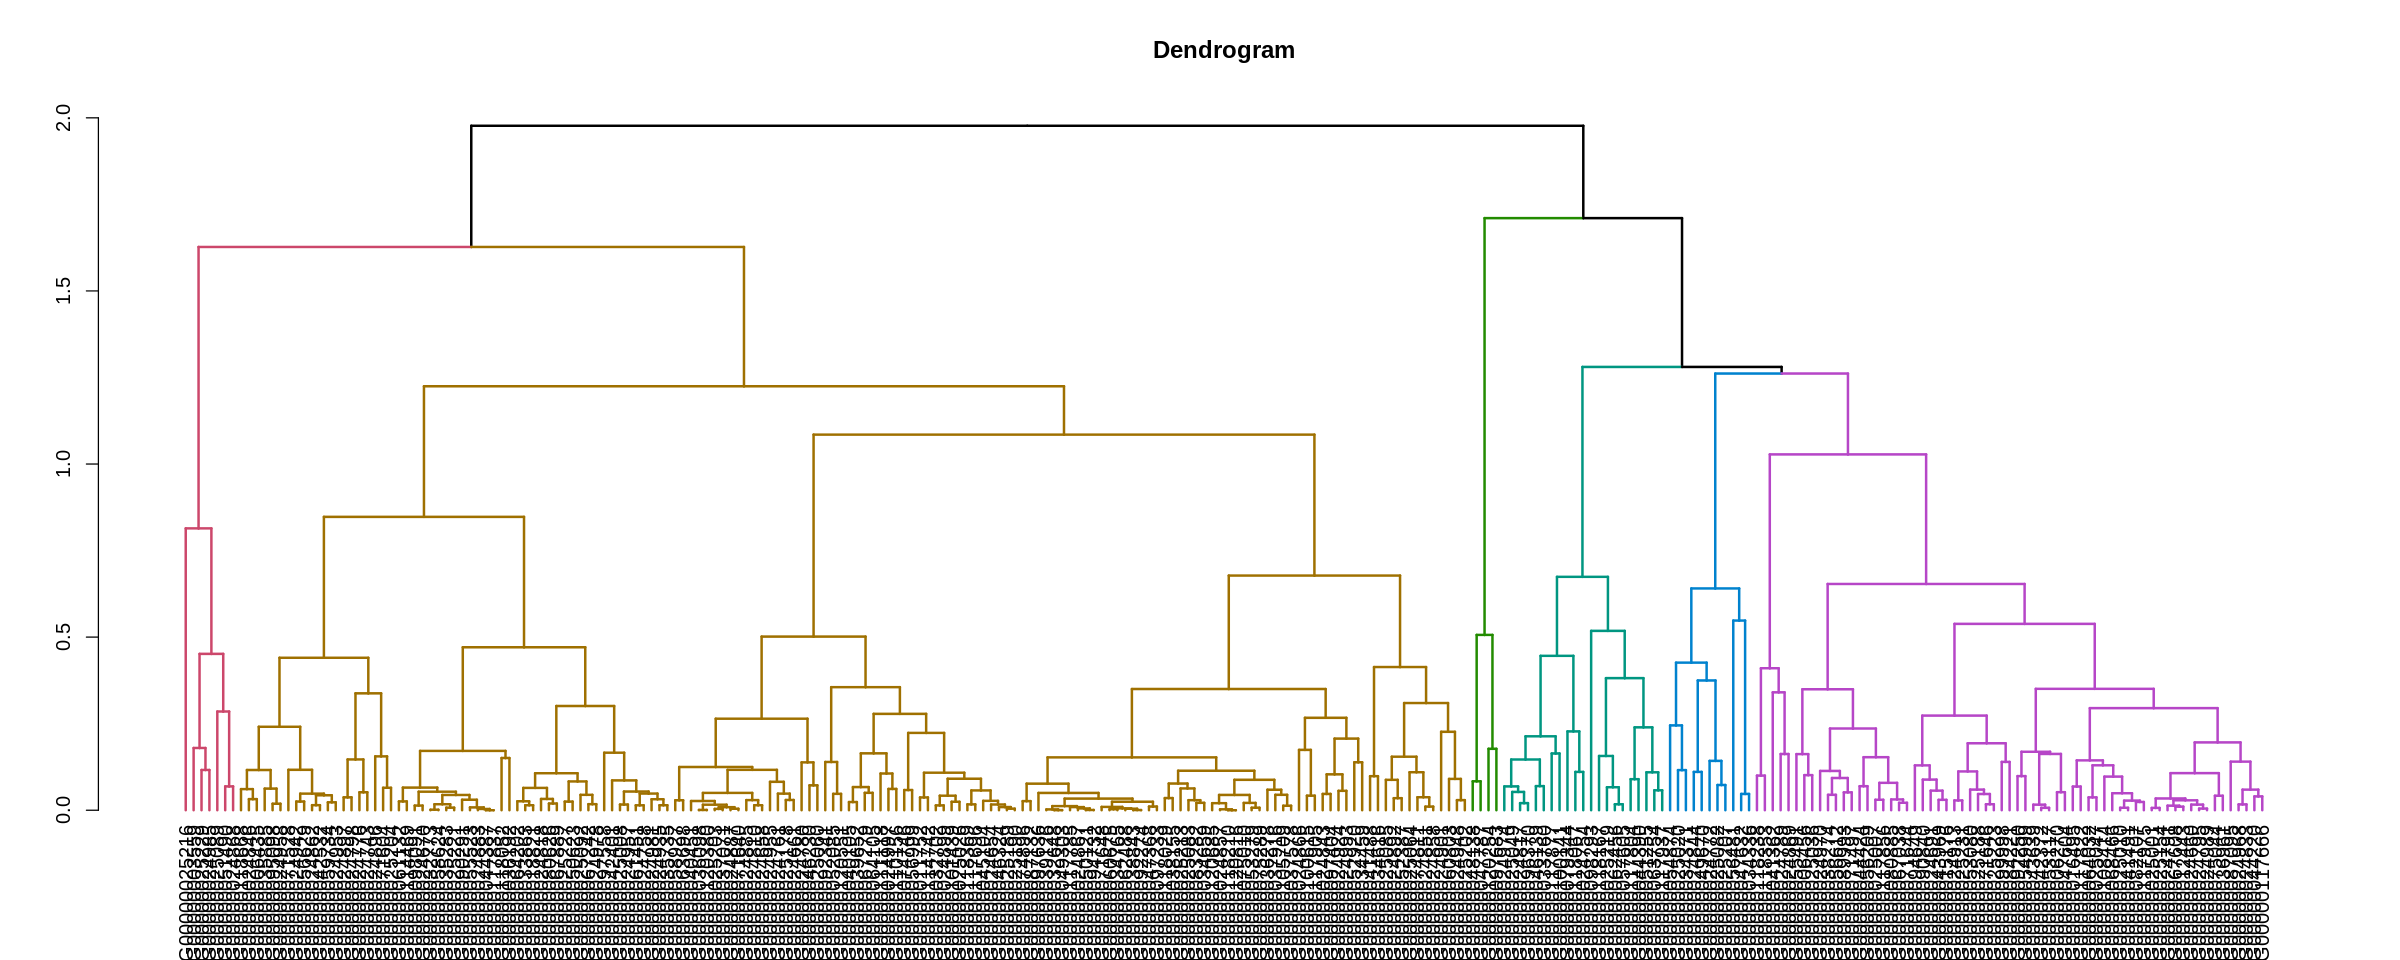

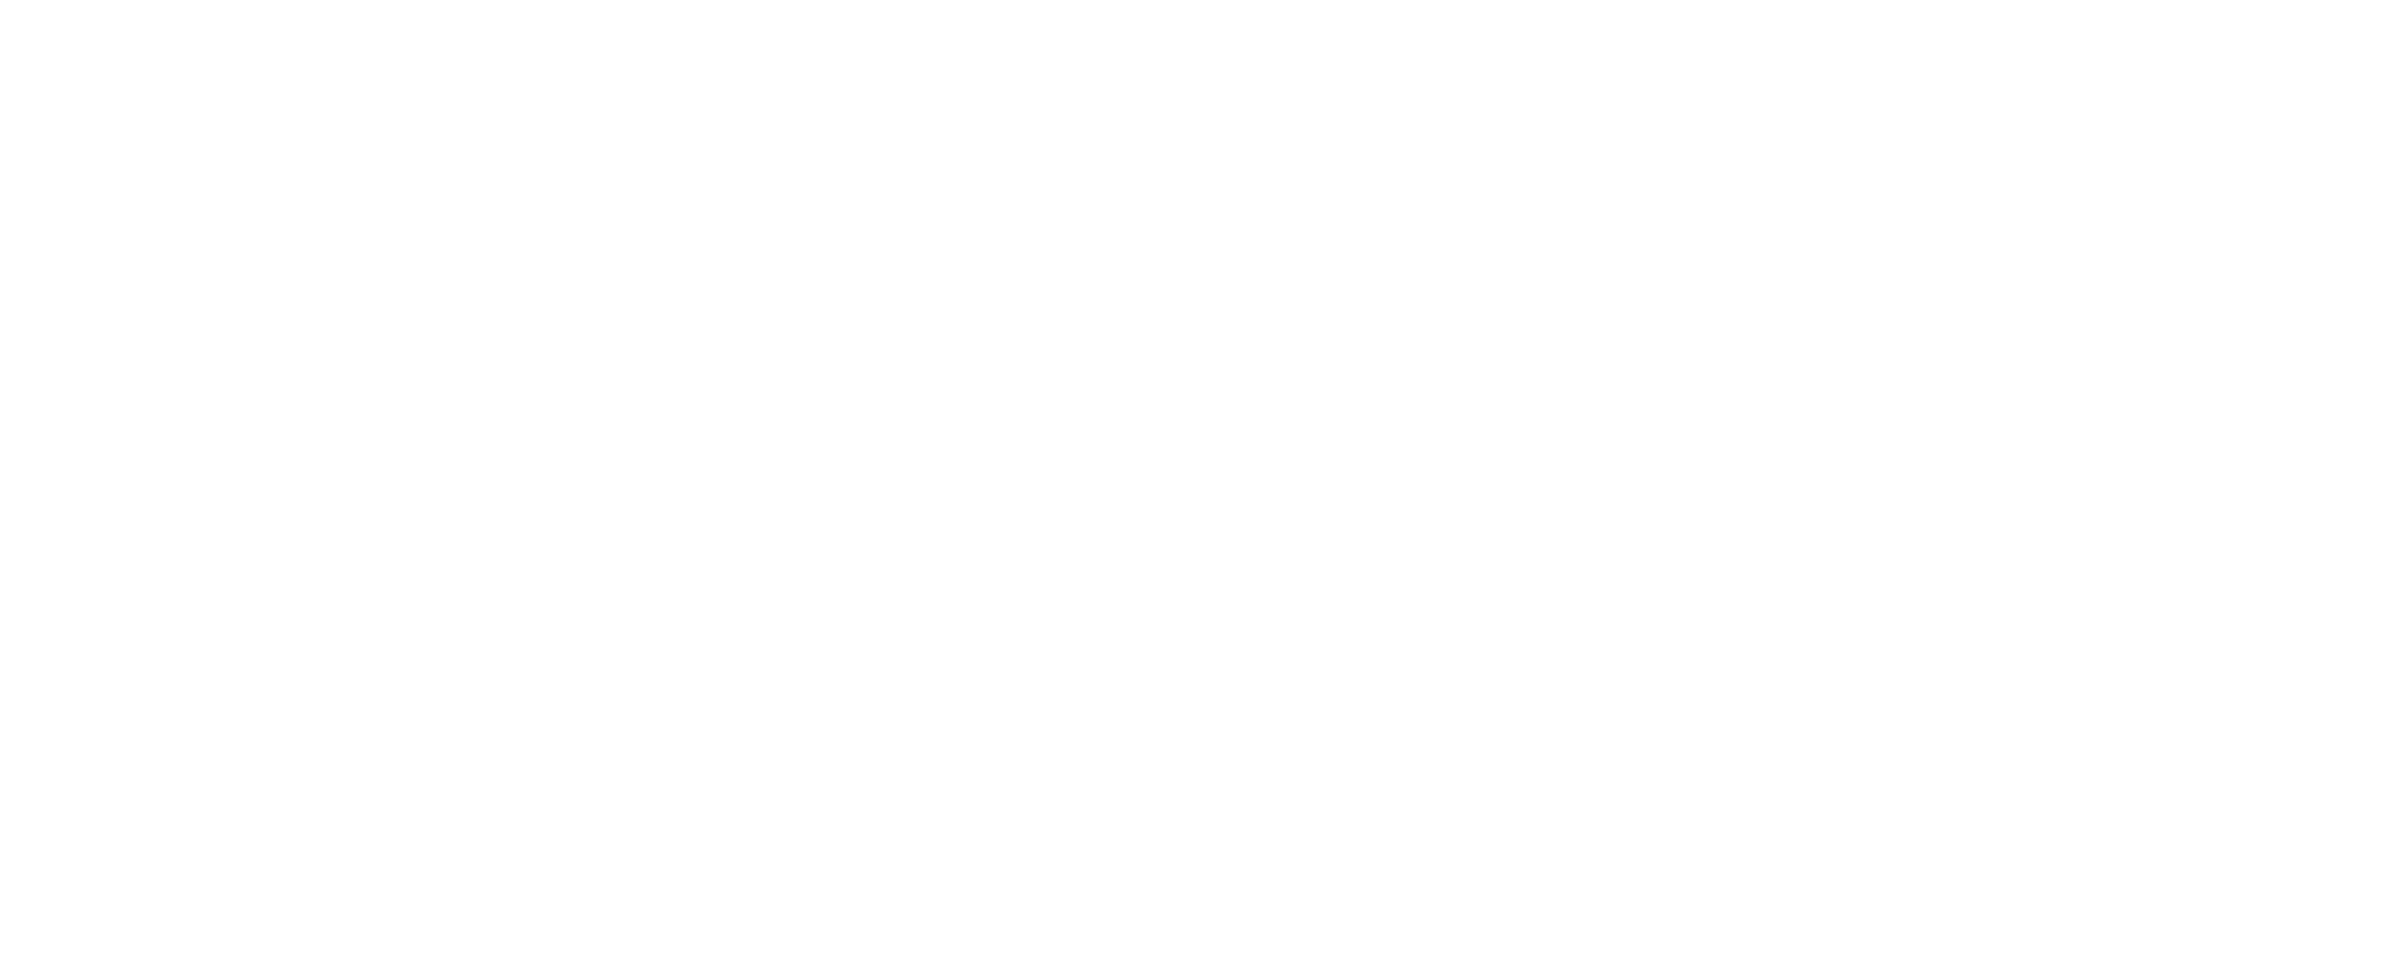

In [114]:

dend <- as.dendrogram(hcl)
dend <- dend %>% color_branches(k = 6) %>% set("branches_lwd", 2) %>% plot(main = "Dendrogram")

plot(dend)

# Нарисуйте для каждого кластера зависимость среднего z-score от возраста для обоих тканей

In [115]:
unique(cl)

[1] 1 2 3 4 5 6

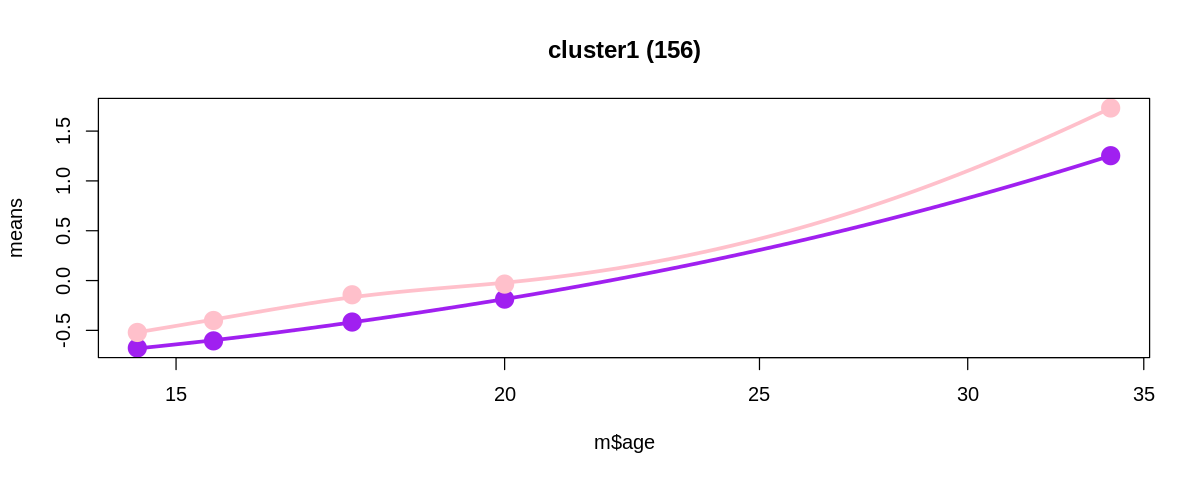

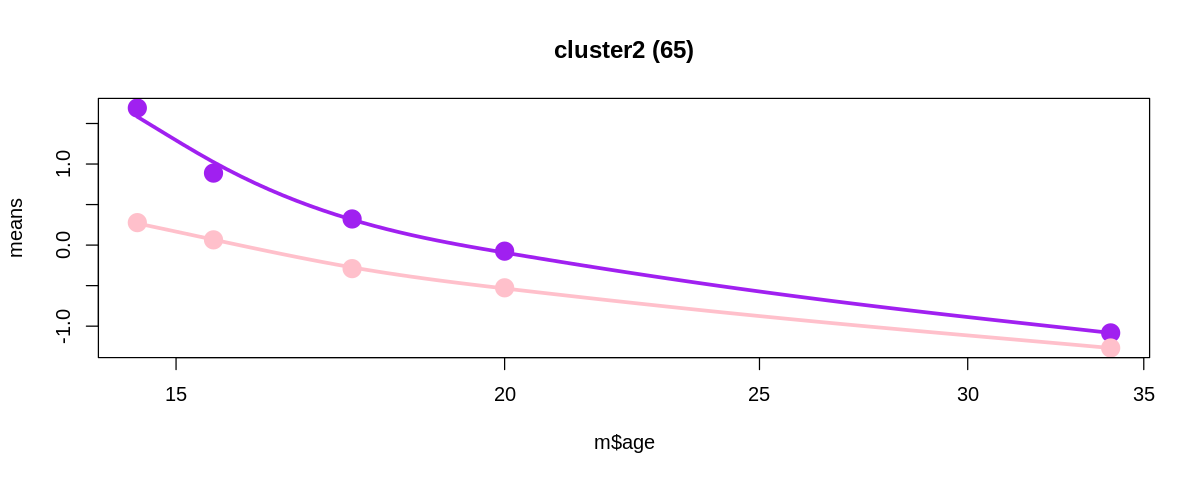

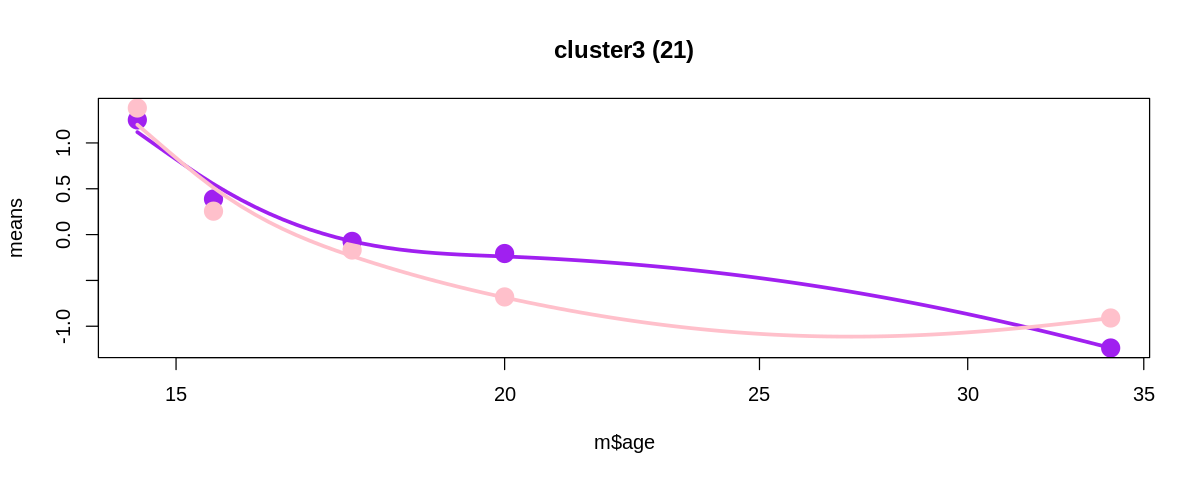

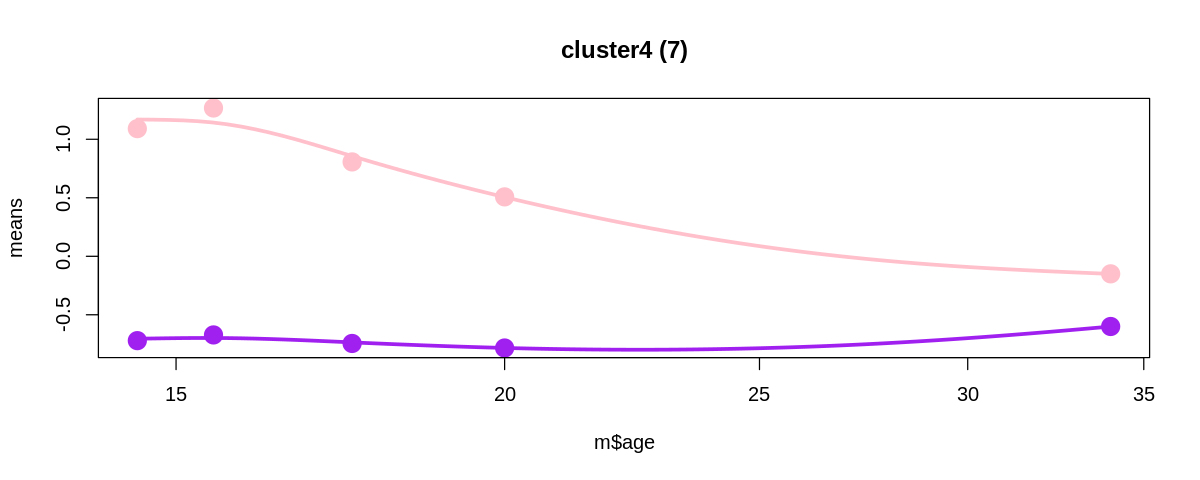

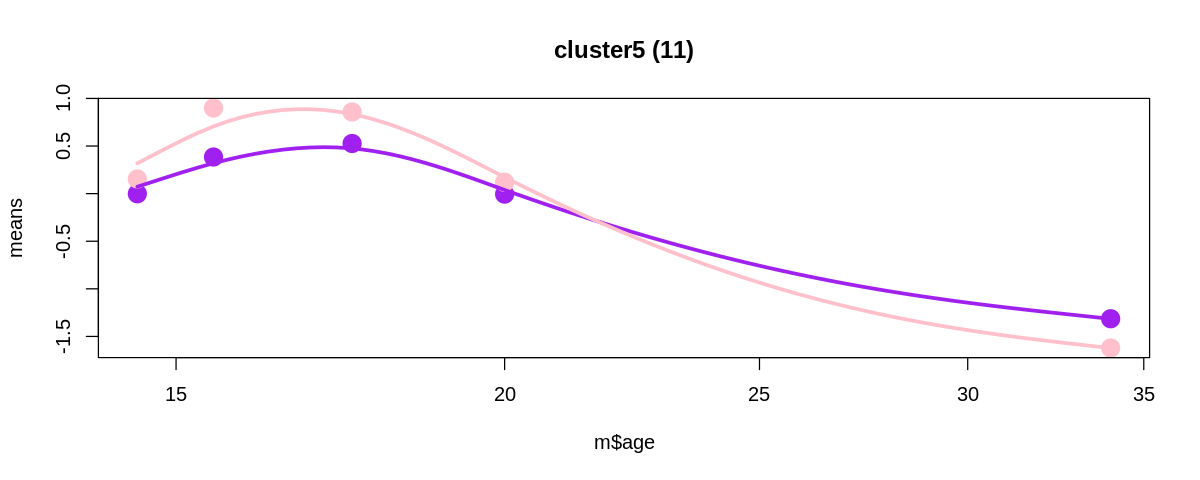

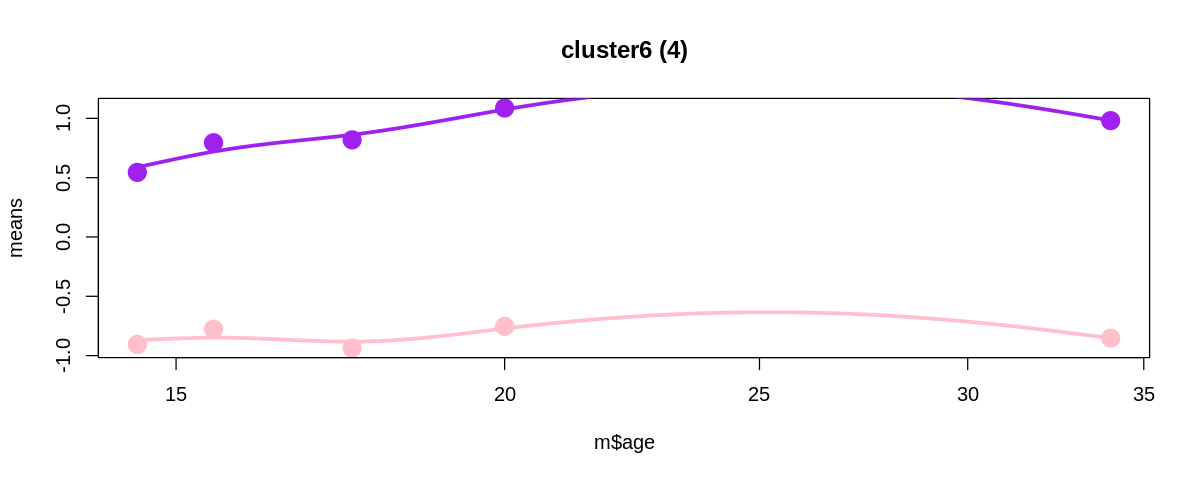

In [116]:
options(repr.plot.width=10, repr.plot.height=4)
for(clustno in unique(cl)){  
  means = apply(cpm.s[cl==clustno,,drop=F],2,mean)  # средние экспресси для данного кластера
  plot(m$age,means,pch=19,col=m$col,main=paste0(sprintf("cluster%s", clustno),' (',sum(cl==clustno),')'),log='x',cex=2) # рисуем средние занчения

  for(t in unique(m$tissue)){  # перебираем ткани 
    f = m$tissue == t # отбираем образцы относящиеся к данной ткани
    ss = smooth.spline(m$age[f],means[f],df=4) # апроксимируем зависимость сплайном
    ss = predict(ss,seq(min(m$age),max(m$age),length.out=100)) # интерполируем
    lines(ss,lwd=3,col=m$col[f][1]) # рисуем апроксимацию
  }
}